In [39]:
import pandas as pd
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')
print(train.shape,test.shape)

(131662, 34) (87395, 34)


In [40]:
train.head

<bound method NDFrame.head of         Trip_Distance  Customer_Since_Months  Life_Style_Index  \
0            0.059310                    0.1          0.311993   
1            0.267719                    1.0          0.411721   
2            0.378902                    1.0          0.417384   
3            0.562339                    1.0          0.417384   
4            0.501653                    1.0          0.482585   
...               ...                    ...               ...   
131657       0.104756                    0.1          0.400432   
131658       0.683988                    0.7          0.419632   
131659       0.365957                    1.0          0.471655   
131660       0.427562                    0.4          0.486214   
131661       0.290580                    0.7          0.455373   

        Customer_Rating  Cancellation_Last_1Month      Var1      Var2  \
0              0.780945                     0.000  0.055556  0.071429   
1              0.689922        

In [41]:
X = train.drop('Surge_Pricing_Type',axis=1)
y = train.Surge_Pricing_Type
X_final = test.drop('Surge_Pricing_Type',axis=1)
print(X.shape,y.shape,X_final.shape)

(131662, 33) (131662,) (87395, 33)


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print("Integer Encoded",integer_encoded[1:100])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded.reshape(-1,1))
print("One Hot Encoded",onehot_encoded[1:10])
y = onehot_encoded

Integer Encoded [1 1 2 1 2 1 1 1 2 1 1 1 0 1 1 2 0 1 2 0 1 2 2 2 0 1 0 0 2 2 2 0 0 1 0 1 2
 1 0 0 1 2 2 2 2 0 1 0 0 2 2 2 0 1 2 1 1 1 0 2 1 2 1 1 2 1 1 1 2 0 2 1 0 2
 2 1 2 1 1 1 2 0 1 1 2 1 0 1 1 2 2 1 0 1 2 1 2 0 2]
One Hot Encoded [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=12332)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,y.shape)

(114545, 33) (17117, 33) (114545, 3) (17117, 3) (131662, 3)


In [77]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import BatchNormalization


input_dim = len(X.columns)

model = Sequential()
model.add(Dense(32, input_dim = input_dim , activation = 'relu'))
#model.add(BatchNormalization())

#model.add(Dense(32, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu'))

#model.add(Dropout(0.3))
#model.add(BatchNormalization())
#model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'] )

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=6, verbose=1, mode='auto',baseline=None, restore_best_weights=True)


history =model.fit(X, y,validation_data=(X, y), epochs = 20, batch_size = 32, callbacks=[es])

scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 131662 samples, validate on 131662 samples
Epoch 1/20
131662/131662 [==============================] - 13s 102us/step - loss: 0.7811 - accuracy: 0.6697 - val_loss: 0.7640 - val_accuracy: 0.6761
Epoch 2/20
131662/131662 [==============================] - 13s 97us/step - loss: 0.7635 - accuracy: 0.6783 - val_loss: 0.7584 - val_accuracy: 0.6799
Epoch 3/20
131662/131662 [==============================] - 13s 99us/step - loss: 0.7605 - accuracy: 0.6788 - val_loss: 0.7567 - val_accuracy: 0.6802
Epoch 4/20
131662/131662 [==============================] - 13s 99us/step - loss: 0.7587 - accuracy: 0.6787 - val_loss: 0.7549 - val_accuracy: 0.6803
Epoch 5/20
131662/131662 [==============================] - 13s 100us/step - loss: 0.7571 - accuracy: 0.6798 - val_loss: 0.7527 - val_accuracy: 0.6816
Epoch 6/20
131662/131662 [==============================] - 13s 100us/step - loss: 0.7552 - accuracy: 0.6805 - val_loss: 0.7505 - val_accuracy: 0.6818
Epoch 7/20
131662/131662 [===================

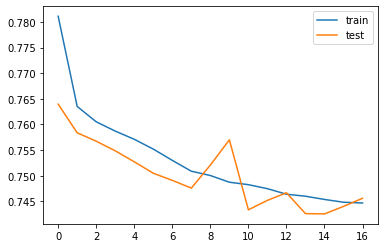

In [79]:
%matplotlib inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

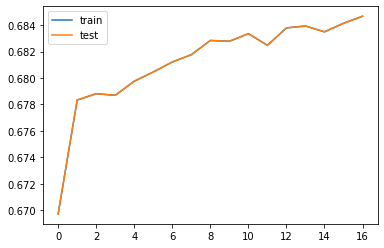

In [80]:
%matplotlib inline
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [81]:
from sklearn.metrics import classification_report
predX = model.predict_classes(X_test)
predX = predX + 1
print("Detailed classification report:")
ytest = onehot_encoder.inverse_transform(y_test)
ytest = ytest + 1
print(classification_report(ytest, predX))

Detailed classification report:
              precision    recall  f1-score   support

           1       0.67      0.53      0.59      3424
           2       0.67      0.80      0.73      7525
           3       0.73      0.65      0.69      6168

    accuracy                           0.69     17117
   macro avg       0.69      0.66      0.67     17117
weighted avg       0.69      0.69      0.69     17117



In [76]:
preds = model.predict_classes(X_final)
preds = preds + 1
df_submit = pd.read_csv('sample_submission.csv')
df_submit['Surge_Pricing_Type'] = preds
df_submit.to_csv('DeepDL.csv',index=False , header=True)

In [74]:
# serialize model to JSON
model_json = model.to_json()
with open("dl.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("dl_w.h5")
print("Saved model to disk")

Saved model to disk
